In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [61]:
import os 
os.getcwd()

'/kaggle/working'

In [62]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [63]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [64]:
df.iloc[:,1:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [65]:
df.iloc[:, 1:].describe(percentiles=[0.0, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85, 0.90, 0.95, 0.99])

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
0%,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
5%,5.000000,0.000000,0.000000,60.713500,17.640000,0.000000
10%,11.000000,0.000000,0.000000,65.789000,19.700000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [67]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [68]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')



In [69]:
df_without_target = df.drop(columns=["id","stroke"], axis=1)
df_target = df[["stroke"]]

In [70]:
df_target.columns

Index(['stroke'], dtype='object')

In [71]:
df_numeric = df_without_target.select_dtypes(include="number")

In [72]:
df_numeric.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')

In [73]:
cols_target = df_numeric.columns.tolist()
index_list = df_numeric.index
df_numeric=pd.DataFrame(imp_mean.fit_transform(df_numeric))
df_numeric.columns= cols_target
df_numeric.index=index_list


In [74]:
df_non_numeric = df_without_target.select_dtypes(include="object")

In [75]:
df_combined = pd.concat([df_numeric, df_target], axis=1)

In [76]:
M_corr = df_combined.corr()

In [77]:
M_corr["stroke"].sort_values(ascending = False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.038947
Name: stroke, dtype: float64

All the features seem to be positively correlated to Stroke. That is increase in 1 unit of any feature increases the probability of stroke.

array([[<AxesSubplot: xlabel='age', ylabel='age'>,
        <AxesSubplot: xlabel='hypertension', ylabel='age'>,
        <AxesSubplot: xlabel='heart_disease', ylabel='age'>,
        <AxesSubplot: xlabel='avg_glucose_level', ylabel='age'>,
        <AxesSubplot: xlabel='bmi', ylabel='age'>,
        <AxesSubplot: xlabel='stroke', ylabel='age'>],
       [<AxesSubplot: xlabel='age', ylabel='hypertension'>,
        <AxesSubplot: xlabel='hypertension', ylabel='hypertension'>,
        <AxesSubplot: xlabel='heart_disease', ylabel='hypertension'>,
        <AxesSubplot: xlabel='avg_glucose_level', ylabel='hypertension'>,
        <AxesSubplot: xlabel='bmi', ylabel='hypertension'>,
        <AxesSubplot: xlabel='stroke', ylabel='hypertension'>],
       [<AxesSubplot: xlabel='age', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='hypertension', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='heart_disease', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='avg_glucose_level', ylabel='

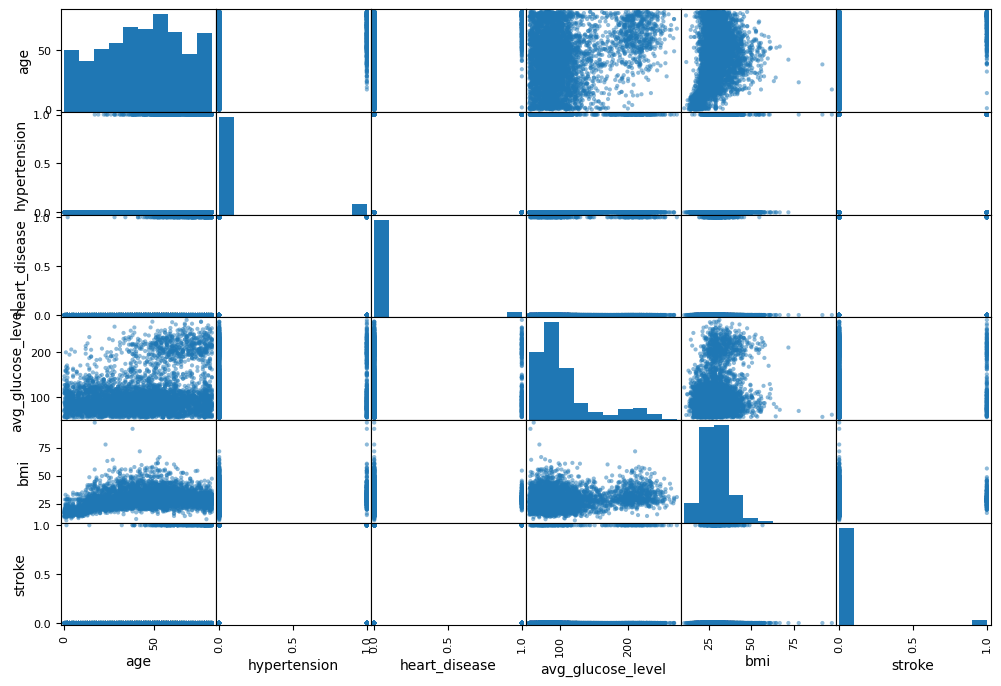

In [78]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_combined, figsize= (12,8))

In [79]:
###   Drop columns with zero variance

from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0)

vt.fit_transform(df_numeric)

cols = vt.get_support(indices =True)

In [80]:
df_with_variance = df_numeric.iloc[:,cols]

In [81]:
df_with_variance.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')

Looks Like all the features have variance. 

In [82]:
#### Omnibus's test for each nummerical feature
without_model_entropy = 0

for  k in np.unique(df_target.stroke.values.tolist()):
    without_model_entropy += -(len(df_target[df_target.stroke==k]))*np.log(len(df_target[df_target.stroke==k])/len(df_target))
without_model_entropy = without_model_entropy*2
print(without_model_entropy)

1990.3725984456637


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

model_entropy  =[]
for f in df_with_variance.columns.tolist():
    print(f)
    lr = LogisticRegression(random_state= 42)
    X = df_with_variance.iloc[:,   df_with_variance.columns.get_loc(f)].values.reshape(-1,1)
    y = df_target.iloc[:,:].values
    lr.fit(X,y)
    y_pred = lr.predict_proba(X)
    p = stats.chi2.pdf( without_model_entropy - 2*log_loss(y,y_pred)*len(y), 1)
    if p<  0.05:
        model_entropy.append((f,without_model_entropy - 2*log_loss(y,y_pred)*len(y)))  ### This is actually saving the reduction in residual deviance
    
    
    
    
    
    

age
hypertension
heart_disease
avg_glucose_level
bmi


In [84]:
md = {}
for c in (model_entropy):
     md[c[0]] = c[1]


In [85]:
df_entropy = pd.DataFrame(md.items(), columns =["Attribute", "Reduction in Chaos"], index=md.keys())

<AxesSubplot: >

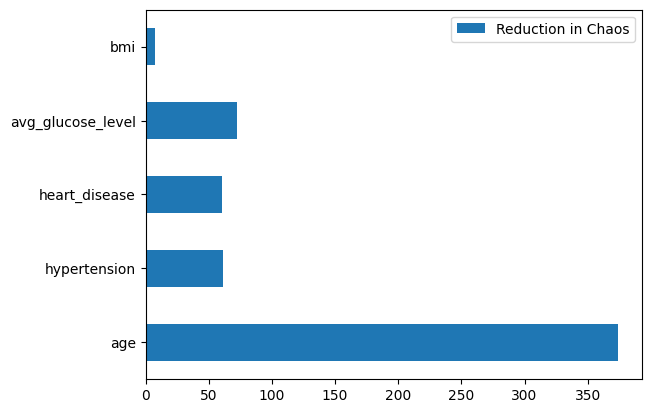

In [86]:
df_entropy.plot.barh()

Though as per Omnibus test, the null hypothesis for bmi is rejected, yet in terms of residual deviance there is not much reduction if a model is defined solely on bmi. Basically the residual deviance says the reduction on chaosness  if a model is developed with the feature.

In [87]:
df_non_numeric.fillna("Not Available", inplace=True)

In [88]:
df_non_numeric.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [89]:
cross = pd.crosstab(df_non_numeric["gender"],df_target["stroke"] )

In [90]:
cross

stroke,0,1
gender,,
Female,2853,141
Male,2007,108
Other,1,0


In [91]:
cross.shape

(3, 2)

In [92]:
from scipy import stats
cat_attri = []
for c in df_non_numeric.columns.tolist():
    cross = pd.crosstab(df_non_numeric[c],df_target["stroke"] )
    chi_p_dof= stats.chi2_contingency(cross)   ### This will have chisquare value, p-value and degree-of-freedom
    if chi_p_dof[1] <0.05:      
        cat_attri.append(c)    ### Null hypothesis (the variable c and stroke are independent) can be rejected 

In [93]:
cat_attri

['ever_married', 'work_type', 'smoking_status']

In [ ]:
df_non_independent = df_non_numeric[cat_attri]

In [ ]:
df_non_independent.columns

It is surprising to see matrital status may not be independent from stroke. 

In [96]:
#### Let us see some plots here. 


df_cat_combined = pd.concat([df_non_independent, df_target], axis =1)

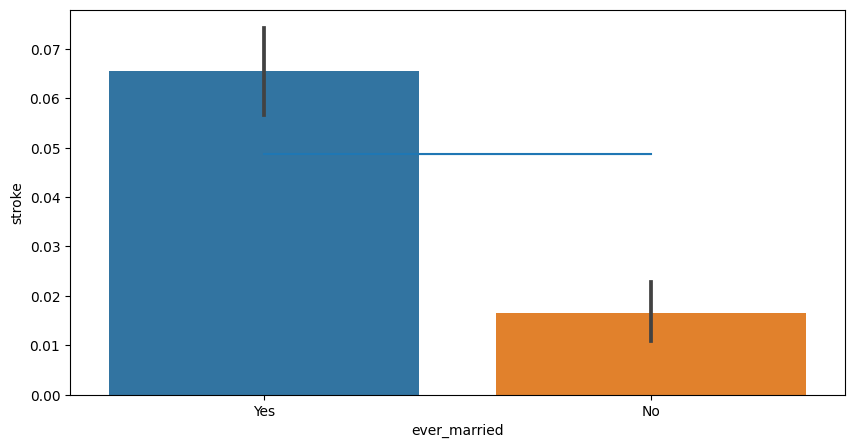

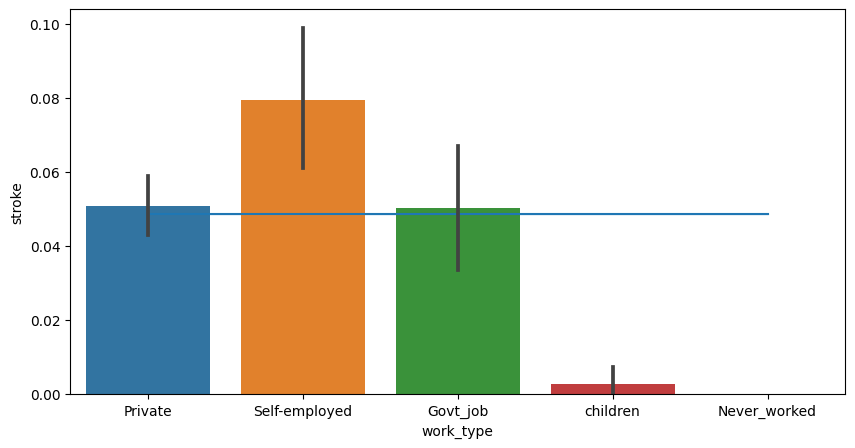

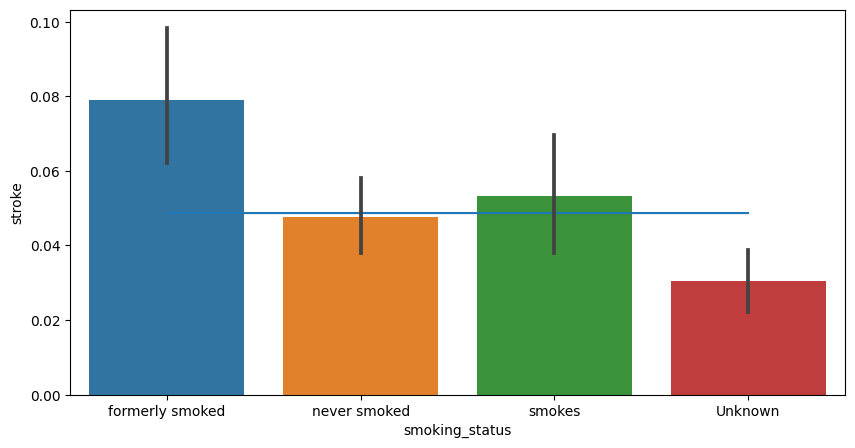

In [97]:
##The following code snippet 
##is taken from https://github.com/neemiasbsilva/case-study-data-science/blob/main/census_income/notebooks/census_income.ipynb

import matplotlib.pyplot as plt
import seaborn as sns

for c in cat_attri:
    plt.figure(figsize=(10,5))
    sns.lineplot(x=c, y = df_cat_combined["stroke"].mean(), data = df_cat_combined)
    sns.barplot(x=c, y = "stroke", data = df_cat_combined, estimator = np.mean)
    plt.show()
    

From the above figures, the maritial status seems to be a discriminator. But this may be a clear misnomer. 

In [98]:
### Let us try to see if maritial status and age has any relationship.

from sklearn.preprocessing import KBinsDiscretizer
bin_size = int(np.log2(df_with_variance.age.max() - df_with_variance.age.min())) +1 

kbin = KBinsDiscretizer(n_bins = bin_size, encode= "ordinal", strategy ="quantile")
df_with_variance_age = df_with_variance[["age"]]
binned_age = pd.DataFrame(kbin.fit_transform(df_with_variance_age), index = df_with_variance_age.index, columns =df_with_variance_age.columns).add_suffix("_Rank")

In [99]:
binned_age

,age_Rank
0,5.0
1,5.0
2,6.0
3,3.0
4,6.0
...,...
5105,6.0
5106,6.0
5107,2.0
5108,4.0


In [100]:

cross_marriage = pd.crosstab(binned_age["age_Rank"],df_non_numeric["ever_married"] )

<AxesSubplot: ylabel='age_Rank'>

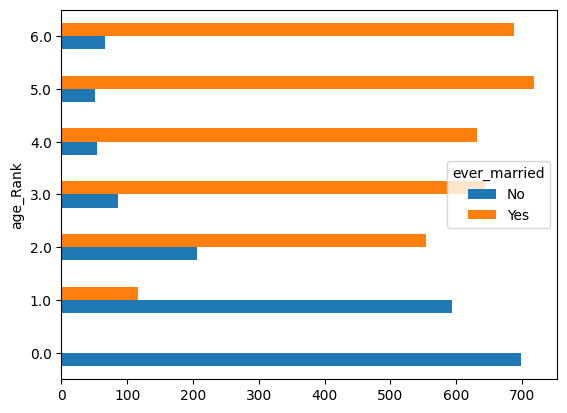

In [101]:
cross_marriage.plot.barh()

We have already seen that age seems to be a contributing factor to stroke (as per Omnibus test). Also wee see that as the rank of the age increase (the intervals of age are increasing), the number of non_married are decreasing. This is probably a possible reason why maritial status seems to have a relation with stroke. 

<AxesSubplot: ylabel='age_Rank'>

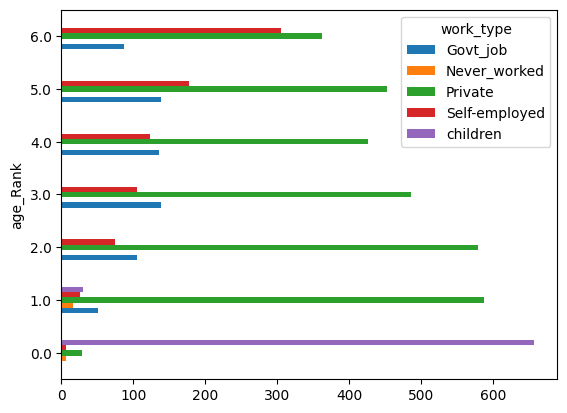

In [106]:
### Similar Analysis for Worktype
cross_worktype= pd.crosstab(binned_age["age_Rank"],df_non_numeric["work_type"] )

cross_worktype.plot.barh()

We have seen that work_type is not independent from storke (as per Chi-Square test of independence). By visual inspection we see that as the age_rank is increasing, the number of self-employed is also increasing and we know age is an important contributor to stroke (as per Omnibus test). This probably explains why work_type turns out not independent from stroke.

In [102]:
list_of_attributes = [c[0] for c in model_entropy] + cat_attri

In [103]:
list_of_attributes

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'ever_married',
 'work_type',
 'smoking_status']

In [104]:
df_combi = pd.concat((df_with_variance, df_non_independent), axis=1)[list_of_attributes]

In [105]:
df_combi.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'ever_married', 'work_type', 'smoking_status'],
      dtype='object')